In [24]:
import prophet
import pandas as pd

In [25]:
STOCK_PRICES_FILENAME = "data/stocks_latest/stock_prices_latest.csv"
STOCK_EARNINGS_FILENAME = "data/stocks_latest/earnings_latest.csv"
STOCK_DIVIDENDS_FILENAME = "data/stocks_latest/stock_dividends_latest.csv"

In [60]:
# load the stock prices
stock_prices = pd.read_csv(STOCK_PRICES_FILENAME)

# filter to MSFT
msft = stock_prices[stock_prices['symbol'] == 'MSFT']

# print number of rows
print("Number of rows: {}".format(len(msft)))


Number of rows: 5899


In [61]:
# sort the msft data by date
msft = msft.sort_values(by='date')

# print any data where the split coefficient is not 1
print(msft[msft['split_coefficient'] != 1.0])


         symbol        date   open   high    low  close  close_adjusted   
19459634   MSFT  1998-02-23  80.94  81.69  79.37  81.62         13.2948  \
19459975   MSFT  1999-03-29  90.12  92.62  87.87  92.37         30.0916   
2683       MSFT  2003-02-18  24.62  24.99  24.40  24.96         16.6157   

            volume  split_coefficient  
19459634  15100450                2.0  
19459975  19944250                2.0  
2683      28707750                2.0  


In [62]:
# lead the earnings data
stock_earnings = pd.read_csv(STOCK_EARNINGS_FILENAME)

# filter to MSFT
msft_earnings = stock_earnings[stock_earnings['symbol'] == 'MSFT']

# print number of rows
msft_earnings

,symbol,date,qtr,eps_est,eps,release_time
101324,MSFT,2009-07-23,06/2009,NaN,NaN,post
101325,MSFT,2009-10-23,09/2009,NaN,NaN,pre
101326,MSFT,2010-01-28,12/2009,NaN,NaN,post
101327,MSFT,2010-04-22,03/2010,NaN,NaN,post
101328,MSFT,2010-07-22,06/2010,NaN,NaN,NaN
101329,MSFT,2010-10-28,09/2010,NaN,NaN,post
101330,MSFT,2011-01-27,12/2010,NaN,NaN,post
101331,MSFT,2011-04-28,03/2011,NaN,NaN,post
101332,MSFT,2011-07-21,06/2011,NaN,NaN,post
101333,MSFT,2011-10-20,09/2011,NaN,NaN,post


In [63]:
# add adjusted_open, adjusted_close, adjusted_high, adjusted_low, and adjusted_volume columns to msft
# go from today to the past
# start with split_factor = 1
# every time there is a nonzero split_coefficient
# multiply split_factor by split_coefficient
# multiple open, close, adjusted_high, adjuste_low, and adjusted_volume by split_factor

# add adjusted_open, adjusted_close, adjusted_high, adjusted_low, and adjusted_volume columns to msft
import math


msft['adjusted_open'] = msft['open']
msft['adjusted_close'] = msft['close']
msft['adjusted_high'] = msft['high']
msft['adjusted_low'] = msft['low']
msft['adjusted_volume'] = msft['volume']

# go from today to the past
# start with split_factor = 1
total_split_coefficient = 1.0

msft['total_split_coefficient'] = total_split_coefficient

# go backwards
msft = msft.sort_values(by='date', ascending=False)
for index, row in msft.iterrows():
    # if split coefficient is not NaN
    if not math.isnan(row['split_coefficient']):
        # multiply split_factor by split_coefficient
        msft.at[index, 'total_split_coefficient'] = total_split_coefficient
        total_split_coefficient *= row['split_coefficient']
    else:
        # update total_split_coefficient
        msft.at[index, 'total_split_coefficient'] = total_split_coefficient

# add the adjusted columns
msft['adjusted_open'] = msft['open'] / msft['total_split_coefficient']
msft['adjusted_close'] = msft['close'] / msft['total_split_coefficient']
msft['adjusted_high'] = msft['high'] / msft['total_split_coefficient']
msft['adjusted_low'] = msft['low'] / msft['total_split_coefficient']
msft['adjusted_volume'] = msft['volume'] * msft['total_split_coefficient']

In [99]:
# add two columns to msft
# 1. days_until_next_earnings: the number of days until the next earnings
# 2. last_eps: the number of days after the earnings

# merge msft and msft_earnings by date, add eps, eps_estimate, and release_time columns
msft_merged = pd.merge(msft, msft_earnings[['date', 'eps', 'eps_est', 'release_time']], on='date', how='left')

# add two columns to merged
msft_merged['last_eps'] = 0
msft_merged['days_until_next_earnings'] = 0

# go from today to the past
# start with last_eps = NaN
last_eps = None

# go backwards
msft_merged = msft_merged.sort_values(by='date', ascending=True)
for index, row in msft_merged.iterrows():
    # if there is an eps
    if not math.isnan(row['eps']):
        # update last_eps
        last_eps = row['eps']
        print("last_eps: {}".format(last_eps), "date", row['date'])
    # update last_eps
    msft_merged.at[index, 'last_eps'] = last_eps

# go from today to the past
# start with days_until_next_earnings = NaN
msft_merged = msft_merged.sort_values(by='date', ascending=False)
days_until_next_earnings = None
# go backwards
for index, row in msft_merged.iterrows():
    # if there is an eps
    if not math.isnan(row['eps']):
        # update days_until_next_earnings
        days_until_next_earnings = 0
    # update days_until_next_earnings
    if days_until_next_earnings and days_until_next_earnings > 120:
        # ignore if days_until_next_earnings is greater than 120s
        days_until_next_earnings = None
        msft_merged.at[index, 'days_until_next_earnings'] = None
    else:
        msft_merged.at[index, 'days_until_next_earnings'] = days_until_next_earnings
    # increment days_until_next_earnings
    if days_until_next_earnings is not None:
        days_until_next_earnings += 1


last_eps: 0.53 date 2012-10-18
last_eps: 0.81 date 2013-01-24
last_eps: 0.72 date 2013-04-18
last_eps: 0.59 date 2013-07-18
last_eps: 0.62 date 2013-10-24
last_eps: 0.78 date 2014-01-23
last_eps: 0.68 date 2014-04-24
last_eps: 0.58 date 2014-07-22
last_eps: 0.54 date 2014-10-23
last_eps: 0.77 date 2015-01-26
last_eps: 0.62 date 2015-04-23
last_eps: 0.62 date 2015-07-21
last_eps: 0.67 date 2015-10-22
last_eps: 0.78 date 2016-01-28
last_eps: 0.62 date 2016-04-21
last_eps: 0.69 date 2016-07-19
last_eps: 0.76 date 2016-10-20
last_eps: 0.83 date 2017-01-26
last_eps: 0.73 date 2017-04-27
last_eps: 0.98 date 2017-07-20
last_eps: 0.84 date 2017-10-26
last_eps: 0.96 date 2018-01-31
last_eps: 0.95 date 2018-04-26
last_eps: 1.13 date 2018-07-19
last_eps: 1.14 date 2018-10-24
last_eps: 1.1 date 2019-01-30
last_eps: 1.14 date 2019-04-24
last_eps: 1.37 date 2019-07-18
last_eps: 1.38 date 2019-10-23
last_eps: 1.51 date 2020-01-29
last_eps: 1.4 date 2020-04-29
last_eps: 1.46 date 2020-07-22
last_eps: 

In [95]:
msft_merged.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,adjusted_open,adjusted_close,adjusted_high,adjusted_low,adjusted_volume,total_split_coefficient,eps,eps_est,release_time,last_eps,days_until_next_earnings
0,MSFT,2021-06-11,257.985,258.4868,256.61,257.89,257.89,18999731,1.0,257.985,257.89,258.4868,256.61,18999731.0,1.0,NaN,NaN,NaN,2.03,NaN
1,MSFT,2021-06-10,254.290,257.4600,253.67,257.24,257.24,24563619,1.0,254.290,257.24,257.4600,253.67,24563619.0,1.0,NaN,NaN,NaN,2.03,NaN
2,MSFT,2021-06-09,253.810,255.5300,253.21,253.59,253.59,17937634,1.0,253.810,253.59,255.5300,253.21,17937634.0,1.0,NaN,NaN,NaN,2.03,NaN
3,MSFT,2021-06-08,255.160,256.0100,252.51,252.57,252.57,22454998,1.0,255.160,252.57,256.0100,252.51,22454998.0,1.0,NaN,NaN,NaN,2.03,NaN
4,MSFT,2021-06-07,249.980,254.0900,249.81,253.81,253.81,23079167,1.0,249.980,253.81,254.0900,249.81,23079167.0,1.0,NaN,NaN,NaN,2.03,NaN


In [174]:
msft_merged.tail()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,adjusted_open,adjusted_close,adjusted_high,adjusted_low,adjusted_volume,total_split_coefficient,eps,eps_est,release_time,last_eps,days_until_next_earnings
4,MSFT,2021-06-07,249.980,254.0900,249.81,253.81,253.81,23079167,1.0,249.980,253.81,254.0900,249.81,23079167.0,1.0,NaN,NaN,NaN,2.03,NaN
3,MSFT,2021-06-08,255.160,256.0100,252.51,252.57,252.57,22454998,1.0,255.160,252.57,256.0100,252.51,22454998.0,1.0,NaN,NaN,NaN,2.03,NaN
2,MSFT,2021-06-09,253.810,255.5300,253.21,253.59,253.59,17937634,1.0,253.810,253.59,255.5300,253.21,17937634.0,1.0,NaN,NaN,NaN,2.03,NaN
1,MSFT,2021-06-10,254.290,257.4600,253.67,257.24,257.24,24563619,1.0,254.290,257.24,257.4600,253.67,24563619.0,1.0,NaN,NaN,NaN,2.03,NaN
0,MSFT,2021-06-11,257.985,258.4868,256.61,257.89,257.89,18999731,1.0,257.985,257.89,258.4868,256.61,18999731.0,1.0,NaN,NaN,NaN,2.03,NaN


In [124]:
# print the msft data 2 days before and after 1999-03-29
print(msft_merged[(msft_merged['date'] >= '2020-03-25') & (msft_merged['date'] <= '2020-04-02')])

    symbol        date    open    high     low   close  close_adjusted   
306   MSFT  2020-03-25  148.91  154.33  144.44  146.92          146.92  \
305   MSFT  2020-03-26  148.40  156.66  148.37  156.11          156.11   
304   MSFT  2020-03-27  151.75  154.89  149.20  149.70          149.70   
303   MSFT  2020-03-30  152.44  160.60  150.01  160.23          160.23   
302   MSFT  2020-03-31  159.40  164.78  156.56  157.71          157.71   
301   MSFT  2020-04-01  153.00  157.75  150.82  152.11          152.11   
300   MSFT  2020-04-02  151.86  155.48  150.36  155.26          155.26   

       volume  split_coefficient  adjusted_open  adjusted_close   
306  75638224                1.0         148.91          146.92  \
305  64694427                1.0         148.40          156.11   
304  57042291                1.0         151.75          149.70   
303  63420326                1.0         152.44          160.23   
302  77927186                1.0         159.40          157.71   
301  

In [121]:
# read the macro data
macro = pd.read_csv("data/macro_monthly.csv")

# rame "DATE" to "date"
macro = macro.rename(columns={'DATE': 'date'})

In [122]:
macro.head()

,date,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [155]:
msft_merged = msft_merged.sort_values(by='date', ascending=True)
macro = macro.sort_values(by='date', ascending=True)

# drop any macro data before the first date in msft_merged

# merge the macro data into msft_merged
msft_plus_macro = pd.merge_ordered(msft_merged, macro, on='date', how='right', fill_method='ffill')

# drop any rows where the symbol is not MSFT
msft_plus_macro = msft_plus_macro[msft_plus_macro['symbol'] == 'MSFT']

msft_plus_macro


,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,adjusted_open,...,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
207,MSFT,1998-04-01,89.81,90.62,88.50,90.37,14.7200,9208900.0,1.0,22.4525,...,7.2,4181.950,8685.6,5788.1,115.19,5.637619,5.445333,674351.0,84.9827,172.500
208,MSFT,1998-05-01,90.19,90.50,88.12,89.62,14.5979,8999000.0,1.0,22.5475,...,6.9,4138.750,8721.1,5837.9,116.02,5.652500,5.488710,674325.0,85.5129,172.900
209,MSFT,1998-06-01,83.87,84.61,83.12,83.75,13.6417,10609200.0,1.0,20.9675,...,6.8,4169.360,8770.5,5871.7,118.57,5.496364,5.558667,703177.0,84.9980,173.200
210,MSFT,1998-07-01,109.12,110.12,107.19,109.37,17.8149,13367600.0,1.0,27.2800,...,6.9,4195.350,8786.0,5890.0,119.09,5.461364,5.535806,696540.0,84.6664,173.500
211,MSFT,1998-08-01,109.12,110.12,107.19,109.37,17.8149,13367600.0,1.0,27.2800,...,6.8,4215.960,8814.4,5925.0,121.17,5.341905,5.546774,698156.0,86.4183,174.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,MSFT,2021-06-01,251.23,251.29,246.96,247.40,247.4000,23213310.0,1.0,251.2300,...,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,MSFT,2021-07-01,251.23,251.29,246.96,247.40,247.4000,23213310.0,1.0,251.2300,...,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,MSFT,2021-08-01,251.23,251.29,246.96,247.40,247.4000,23213310.0,1.0,251.2300,...,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,MSFT,2021-09-01,251.23,251.29,246.96,247.40,247.4000,23213310.0,1.0,251.2300,...,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


In [156]:
# final prep, drop "open", "high", "low", "close", then rename "adjusted_open", "adjusted_high", "adjusted_low", "adjusted_close" to "open", "high", "low", "close"
msft_plus_macro = msft_plus_macro.drop(columns=['open', 'high', 'low', 'close'])
msft_plus_macro = msft_plus_macro.rename(columns={'adjusted_open': 'open', 'adjusted_high': 'high', 'adjusted_low': 'low', 'adjusted_close': 'close'})


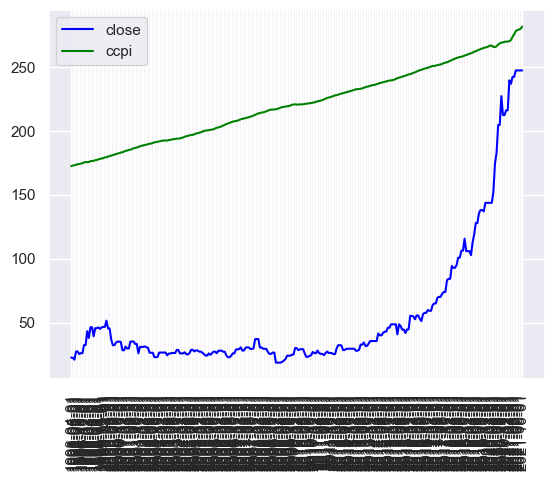

In [148]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plot the adjusted_close, as well as the macro data
plt.plot(msft_plus_macro['date'], msft_plus_macro['close'], label='close', color='blue')
plt.plot(msft_plus_macro['date'], msft_plus_macro['ccpi'], label='ccpi', color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()


In [171]:
# use prophet to predict the close price
# create a prophet model
model = prophet.Prophet()

# rename date to ds and close to y
msft_plus_macro = msft_plus_macro.rename(columns={'date': 'ds', 'close': 'y'})




14:32:06 - cmdstanpy - INFO - Chain [1] start processing
14:32:06 - cmdstanpy - INFO - Chain [1] done processing


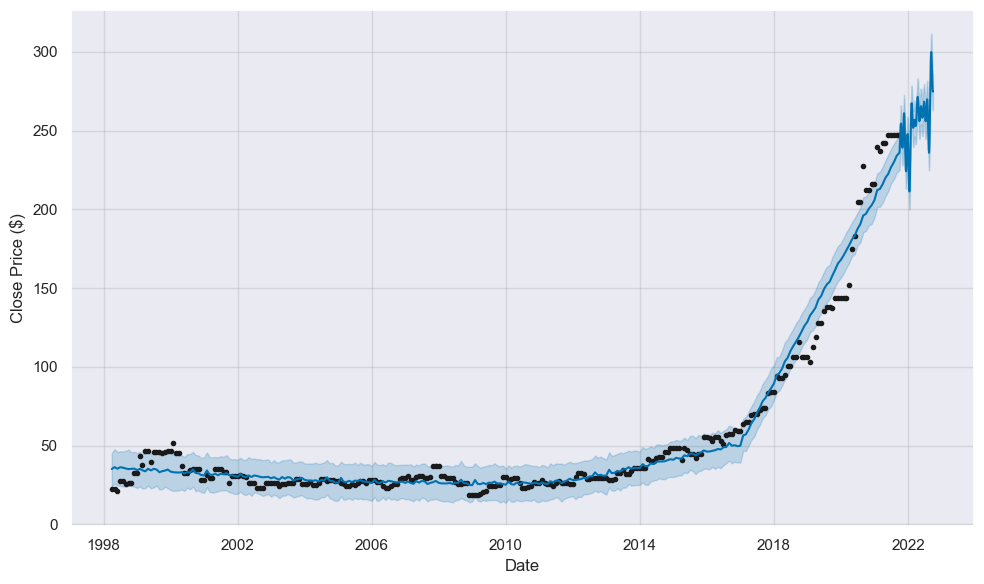

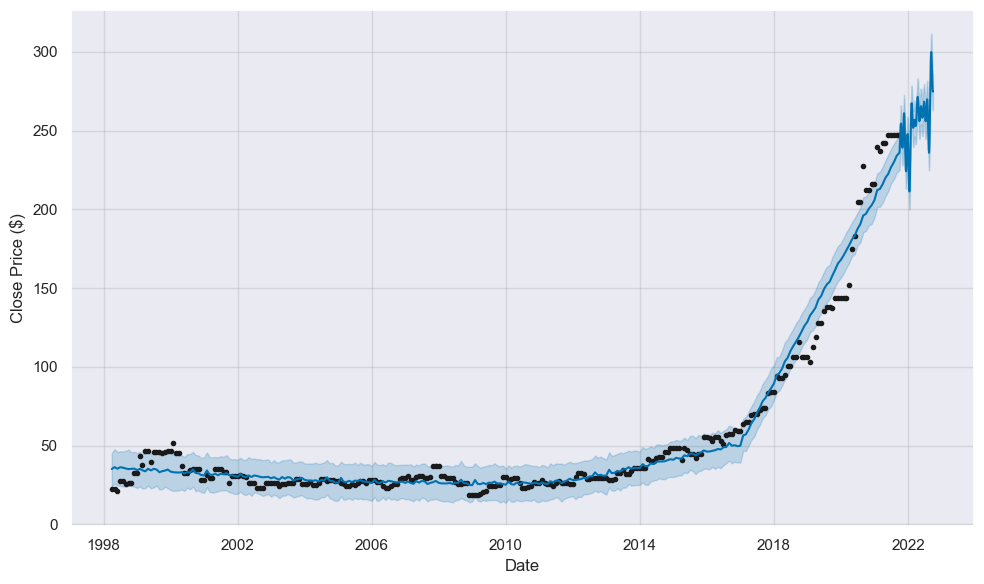

In [173]:
# feed data until 2021-01-01 into the model
model.fit(df=msft_plus_macro)

# create a dataframe with the dates we want to predict
future = model.make_future_dataframe(periods=365)

# predict the future, specifically the close price
forecast = model.predict(future)

# plot the forecast, from 2020 onwards
model.plot(forecast, xlabel='Date', ylabel='Close Price ($)')



In [164]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/41 [00:00<?, ?it/s]

14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing
14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1] done processing
14:23:50 - cmdstanpy - INFO - Chain [1] start processing
14:23:50 - cmdstanpy - INFO - Chain [1]

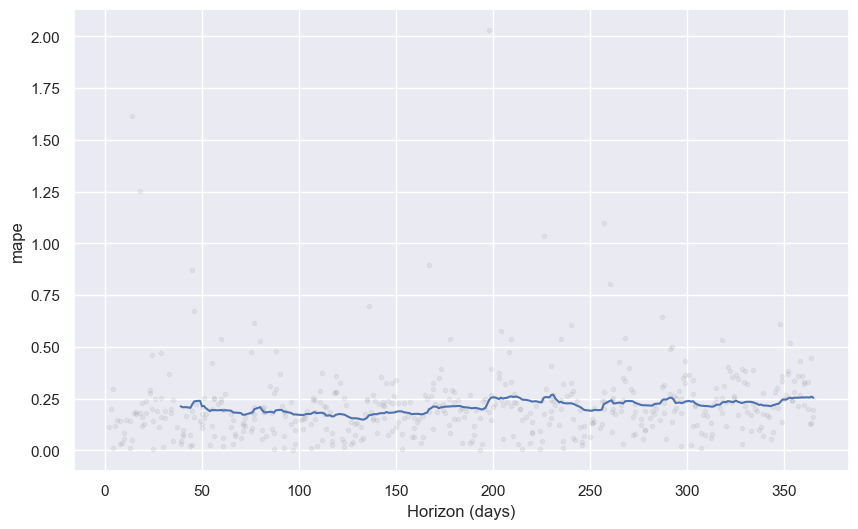

In [182]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')



14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/42 [00:00<?, ?it/s]

14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:43 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1] done processing
14:33:44 - cmdstanpy - INFO - Chain [1] start processing
14:33:44 - cmdstanpy - INFO - Chain [1]

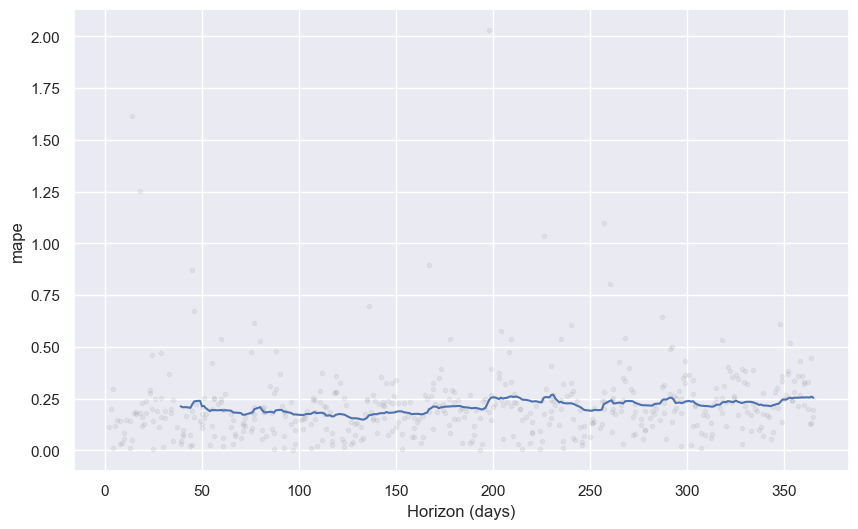

In [180]:
# Create a second model

# this time we'll add the earnings dates as holidays
# create a dataframe with the earnings dates
msft_earnings_dates = msft_earnings[['date']]
msft_earnings_dates = msft_earnings_dates.rename(columns={'date': 'ds'})
msft_earnings_dates['holiday'] = 'earnings'

# create a model with the earnings dates as holidays
model2 = prophet.Prophet(holidays=msft_earnings_dates)

model2.fit(msft_plus_macro)

# create a dataframe with the dates we want to predict
future2 = model2.make_future_dataframe(periods=365)

from prophet.diagnostics import cross_validation
df_cv = cross_validation(model2, initial='730 days', period='180 days', horizon = '365 days')

# show the forecast quality
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


